In [1]:
from data.data_manager_depth import ISRLHumanDepthDatasetManager
from data.data_manager_test import ISRLHumanTestDatasetManager
from data.data_config import ISRLHumanConfig
from mrcnn.model import MaskRCNN
from predict_config import PredictionConfig
from evaluate import evaluate_model, evaluate_model_yolo
from plot_predict import plot_maskrcnn, plot_dataset
import numpy as np

from evaluate import get_precision_recall_for_mrcnn, plot_precision_recall_my, get_precision_recall_for_yolo

/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

# Import Datasets

In [2]:
# train set
train_set = ISRLHumanDepthDatasetManager()
train_set.load_dataset('../../../../datasets/intro2CV_dataset', dataset_type="train")
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# validation set
val_set = ISRLHumanDepthDatasetManager()
val_set.load_dataset('../../../../datasets/intro2CV_dataset', dataset_type="val")
val_set.prepare()
print('Val: %d' % len(val_set.image_ids))

# test set
test_set = ISRLHumanDepthDatasetManager()
test_set.load_dataset('../../../../datasets/intro2CV_dataset', dataset_type="test")
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

# TEST 2 DATASET
test_set_2 = ISRLHumanTestDatasetManager()
test_set_2.load_dataset('../../../../datasets/intro2CV_dataset2', start=0, size=10)
test_set_2.prepare()
print('Test2: %d' % len(test_set_2.image_ids))

Indices: [ 39 166  93  62 195 119  38 184 160  89   4 124 191  95  98 106  31 105
  67 214 110  34 162 168  44 163 188 218  18 152 220 181 107  19  84  91
  33  51  35  11  29   0 202  99 138  85  28  16 114 122  73  58 120  47
  78 179  27 222  40 130  69 224 155 207 171 158 102  88  59 215 151 197
 223  14 145  21  56 194  55 154  53 116 159  90 108  42  17   5 167 117
  48 182  66  70 199 208  54 169 170 212  97 118 164 189  94 187  12 150
 127 216 147 176 123  81 148 180  13 200  82 112 161 201  45 132 103  36
 183 209 185 219  75 206 196 174   2 172   6 190 177  77 113  65  46  74
  92 165  87 143 205  10  32 136  83 210 100 125  23 126]
Train: 158
Indices: [  9 193 104 153 173 135 111 211  64  15  41 186 109  80  52  26  76  43
  24   3 217  49 149 131 213  30 121 175 115 198   8  60 128   1  57  22
  61  63   7 221 141  86  96  68]
Val: 44
Indices: [ 50 142 157 156 139 146 101  20 178  25 134  71 204 129 144 192  79 133
 203 137  72 140  37]
Test: 23
0
1
2
3
4
5
6
7
8
9
10
11
12

(720, 1280, 3)
(720, 1280, 1)


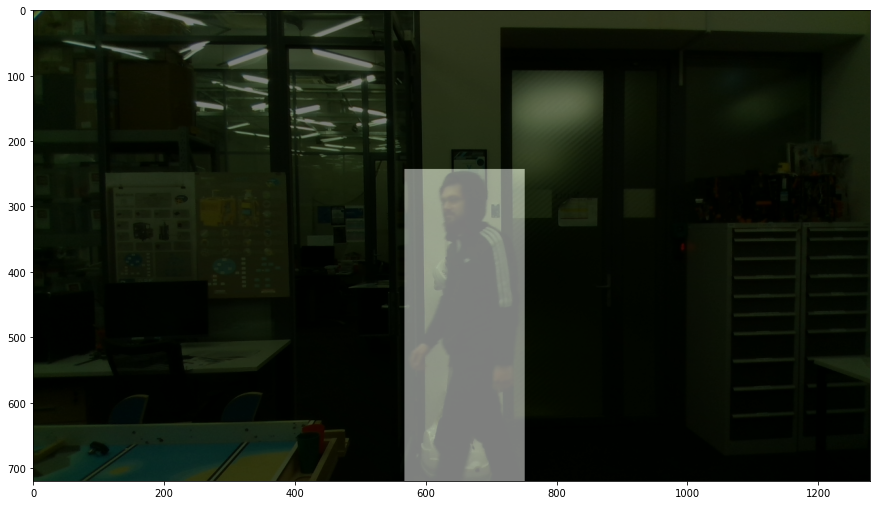

In [3]:
plot_dataset(test_set_2, 0)

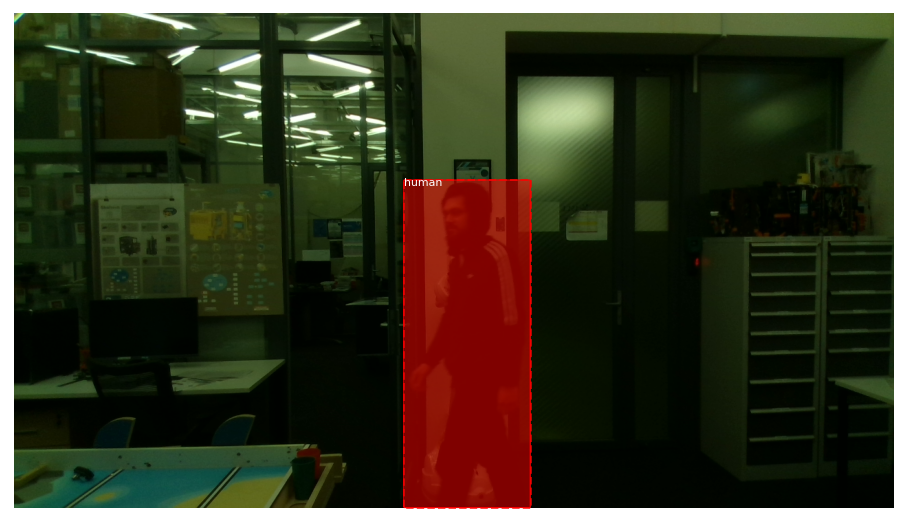

In [4]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

image_id = 0
image = test_set_2.load_image(image_id)
mask, class_ids = test_set_2.load_mask(image_id)
bbox = extract_bboxes(mask)
display_instances(image, bbox, mask, class_ids, train_set.class_names)

# Precision Recall for Mask RCNN

In [5]:
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model.load_weights('../../models/mask_rcnn_human_cfg_0005_3_train_test_val_human_mask.h5', by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [6]:
import timeit

In [7]:
start = timeit.default_timer()
mAP, recall_precision = evaluate_model(test_set_2, model, cfg, 0.5)
end = timeit.default_timer()
print("mAP: ", mAP)
print("It took: " + str(end - start) + " secs")

Counter: 1
Counter: 2
Counter: 3
Counter: 4
Counter: 5
Counter: 6
Counter: 7
Counter: 8
Counter: 9
Counter: 10
mAP:  0.1
It took: 24.694510966000962 secs


In [11]:
recall_precision_array = np.array(recall_precision)
np.savetxt('recall_precision_mask_rcnn_0_3.txt', recall_precision_array)

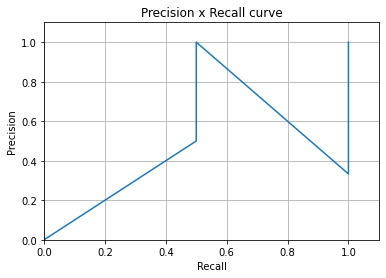

In [12]:
sorted_recall_precision = sorted(recall_precision)
sorted_recall_precision = np.array(sorted_recall_precision)
plot_precision_recall_my(sorted_recall_precision)

In [13]:
markers = np.loadtxt('recall_precision_mask_rcnn_0_5.txt')

In [14]:
markers

array([[1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])

In [8]:
recall_precision

[[1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0]]

### Initial

(720, 1280, 3)
(720, 1280, 1)


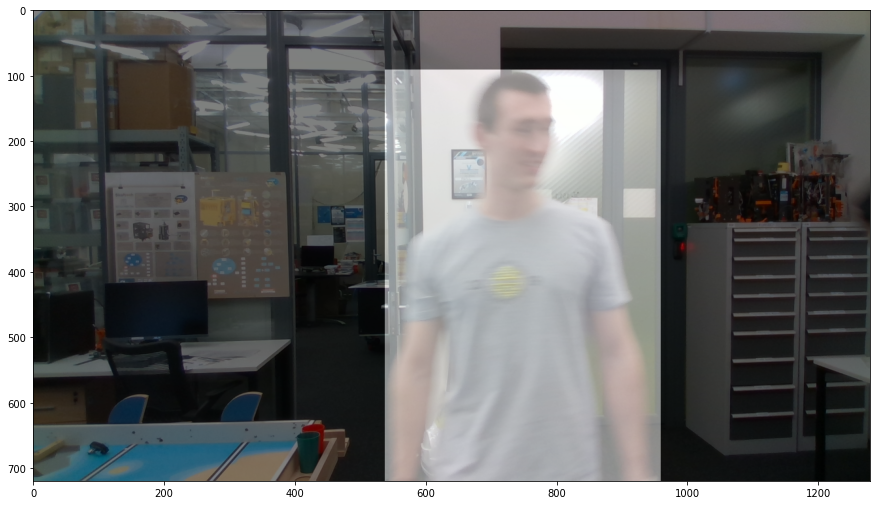

In [24]:
plot_dataset(test_set_2, 0)

### Predicted

Processing 1 images
image                    shape: (720, 1280, 3)        min: -123.70000  max:  151.10000  float64
molded_images            shape: (1, 1024, 1024, 3)    min: -247.40000  max:   47.20001  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


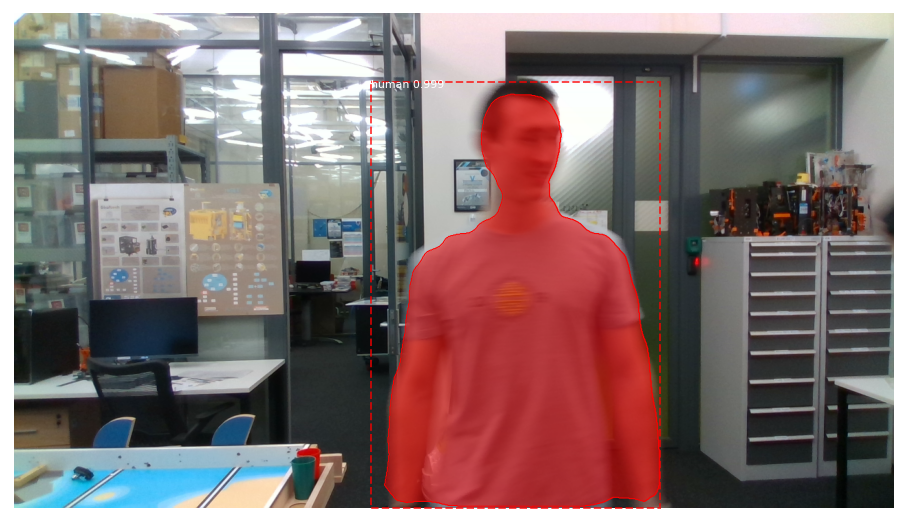

In [25]:
plot_maskrcnn(test_set_2, model, cfg, 0)